In [3]:
from keras.datasets import cifar10
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
print("訓練資料維度:", x_train.shape)
print("測試資料維度:", x_test.shape)

訓練資料維度: (50000, 32, 32, 3)
測試資料維度: (10000, 32, 32, 3)


In [9]:
labels = {0:"飛機", 1:"車", 2:"鳥", 3:"貓",
          4:"鹿", 5:"狗", 6:"青蛙", 7:"馬",
          8:"船", 9:"卡車"}

第幾張圖片: 46514
是什麼東西: 車


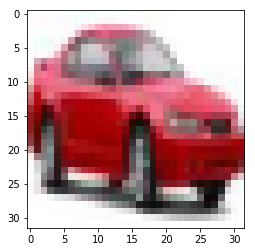

In [14]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
i = random.randint(0, x_train.shape[0])
print("第幾張圖片:", i)
# 以前[0, 1, 2, 1...] -> keras[ [0], [1], [2], [1] ]
print("是什麼東西:", labels[y_train[i][0]])
plt.imshow(x_train[i])

In [17]:
from keras.utils import np_utils
x_train_normal = x_train.astype(float) / 255
x_test_normal = x_test.astype(float) / 255
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)

In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
model = Sequential()
model.add(Conv2D(filters = 32,
                 input_shape = (32, 32, 3),
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64,
                 kernel_size = (3, 3),
                 activation = 'relu',
                 padding='same'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(units = 256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(units = 10, activation = "softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 4096)              0         
__________